In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis of defenders in the 2021 MLS season.
The notebook is comprised of 4 sections 

1 box plots of key features to observe feature distribution

2 correlation heat maps and pair grids to gain insight of feature correlation 

3 scatters plots of key features to help identify unique defenders. 

4 PCA analysis to show spread of variation among key features. 

In [2]:
df = pd.read_csv('../data/final_per_90_and_pAdj.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 110 entries, fb_id to attacking_touches
dtypes: float64(102), int64(1), object(7)
memory usage: 606.0+ KB


## Feature vizual exploration 

- with the data now scaled to per 90 and possesion adjusted key features are to be visualised and observed below to looks for trends. 

## need definition for there below  'Aerial_win_pct',
'pAdj_Tackle_int_blocks',
'True_tackle_pct',
'pct_long_balls', - shows amount player 
'prog_carry+lng_comp+crosses', value to show all expansive attacking passes and moves in one metric
'attacking_touches',
'Key_pass',
'Comp_prog',
'avg_shrt+med_pass_pct',
'Long_Cmp_pct'

In [4]:
# create defender only df 
defenders = df.loc[(df['Position']=='DF')&( df['Nineties'] >5)]

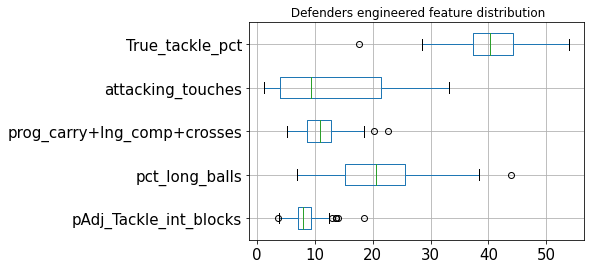

In [5]:
#use boxplot to observe outliers - key for anamoly dection 


boxplot = defenders[[
    # feature generated 
    'pAdj_Tackle_int_blocks','pct_long_balls','prog_carry+lng_comp+crosses','attacking_touches','True_tackle_pct'

]].boxplot(grid = True,vert=False,fontsize=15).set(title=' Defenders engineered feature distribution')


plt.show()


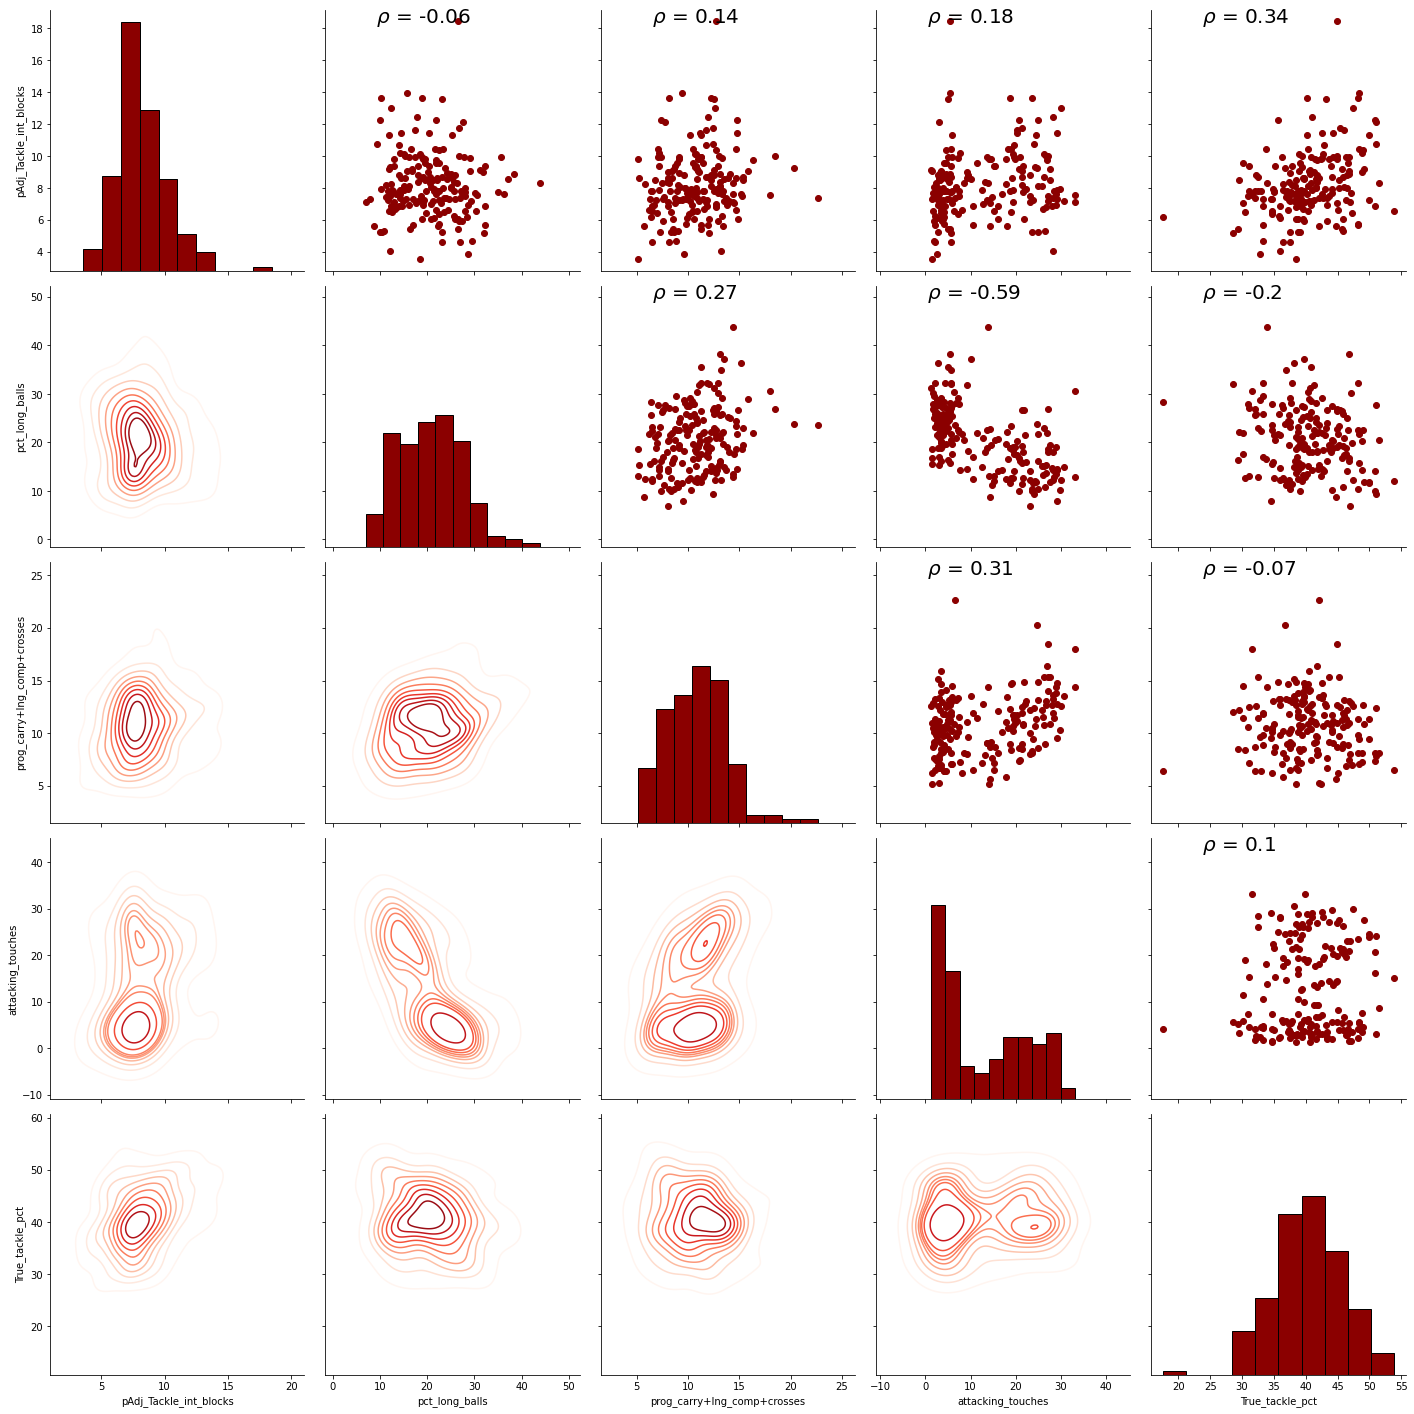

In [6]:
data =defenders[['pAdj_Tackle_int_blocks','pct_long_balls','prog_carry+lng_comp+crosses','attacking_touches','True_tackle_pct'
]]
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(data= data,vars = ['pAdj_Tackle_int_blocks','pct_long_balls',
                                       'prog_carry+lng_comp+crosses','attacking_touches',
                                       'True_tackle_pct'], size = 4)

# # Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

## Insight from distributions 
- percent long balls and attacking touches have a strong inverse relationship showing players who play long balls at a high frequency at not taking touches in advnaced area of the field. 
- The KDE plots show that attacking touches shows two clusters of players when compared to the other metrics while the other KDE plots show a singular central value that most players are around. 

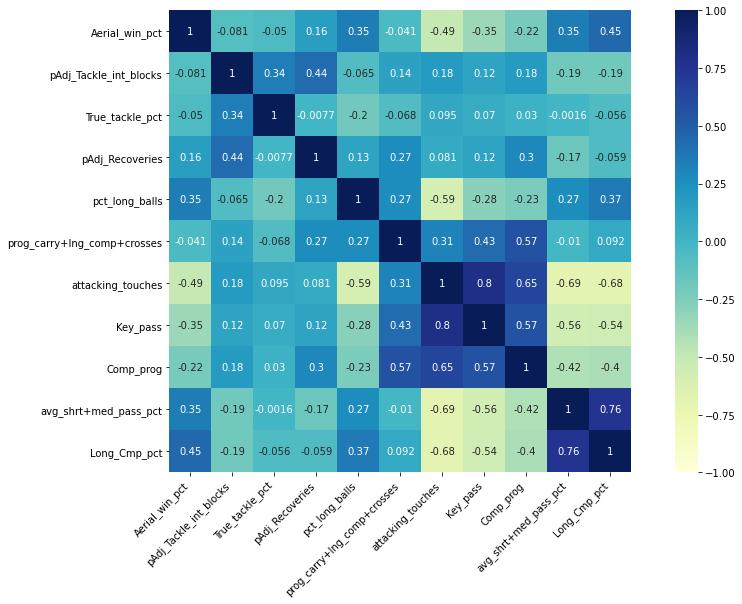

In [7]:
corr = defenders[['Aerial_win_pct','pAdj_Tackle_int_blocks','True_tackle_pct','pAdj_Recoveries','pct_long_balls','prog_carry+lng_comp+crosses','attacking_touches','Key_pass',
 'Comp_prog','avg_shrt+med_pass_pct','Long_Cmp_pct']].corr()

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 8.5)

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
    cmap="YlGnBu",annot=True,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



## Insight - 
- Key passes and attacking touches have a high correlation as most key passes to create goal scoring changes will be where attacking touches are made.
- Completed progressive pass and average short+ medium pass pct are inversely correlated pointing towards players who complete more progressive passes have lower avg pass pct as they try to play dangerous passes that progress the team attack forward.
-  The three defensive features True tackle pct, tackle int blocks and recoveries  are correlated to each other but not to the other more offensive minded features. 
- Aerial win percentage is most correlated with long completion pct high lighting two major defensive actions sought after in the league in defenders. 


# Passing features 

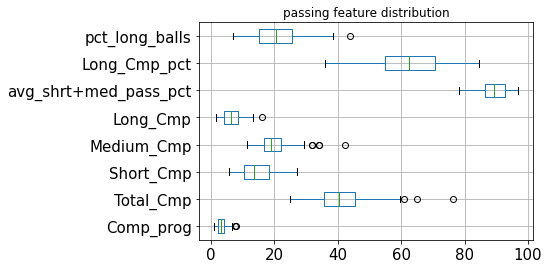

In [14]:
data = defenders[[ 'Comp_prog',
 'Total_Cmp',
    'Short_Cmp',
     'Medium_Cmp',
    'Long_Cmp',
    'avg_shrt+med_pass_pct',
    'Long_Cmp_pct',
    'pct_long_balls',
 ]]

boxplot = data.boxplot(grid = True,vert=False,fontsize=15).set(title='passing feature distribution')


plt.show()

## 3 Scatter plots of key features to target distictive defenders

3.1

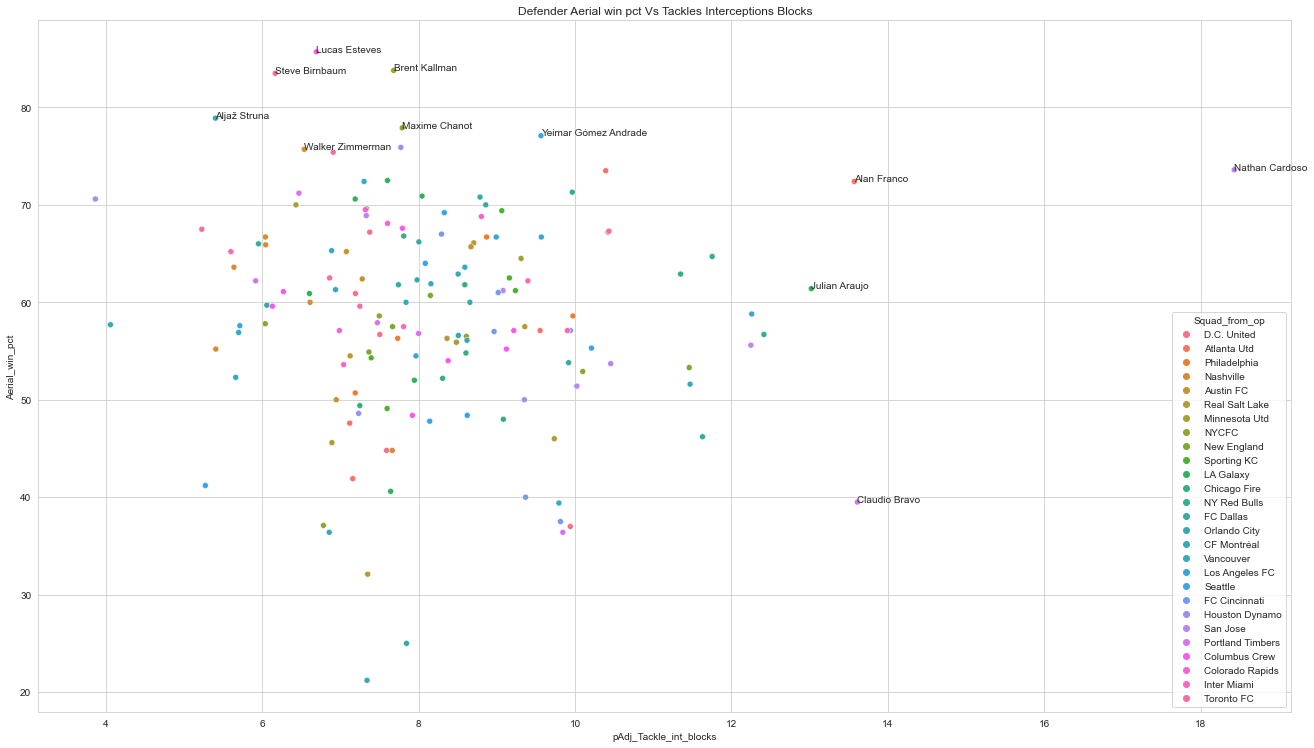

In [15]:
graph = defenders.loc[(df['pAdj_Tackle_int_blocks']<35)&(df['Position']=='DF')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>10)]

sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)


x =graph['pAdj_Tackle_int_blocks']
y = graph['Aerial_win_pct']

p = graph['player_name']

g = sns.scatterplot(data=graph, x =x, y=y ,
                    hue='Squad_from_op',
                ax=ax).set(title='Defender Aerial win pct Vs Tackles Interceptions Blocks')



for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 77:
         plt.annotate(p, (x, y))
    if x > 13:
        plt.annotate(p,(x,y))

plt.tight_layout()

### Walker Zimmerman is in the top of the graph but not the right of the graph of the graph showing he doesnt need to have a tone of interceptions tackles and recoveries to be at the best defender

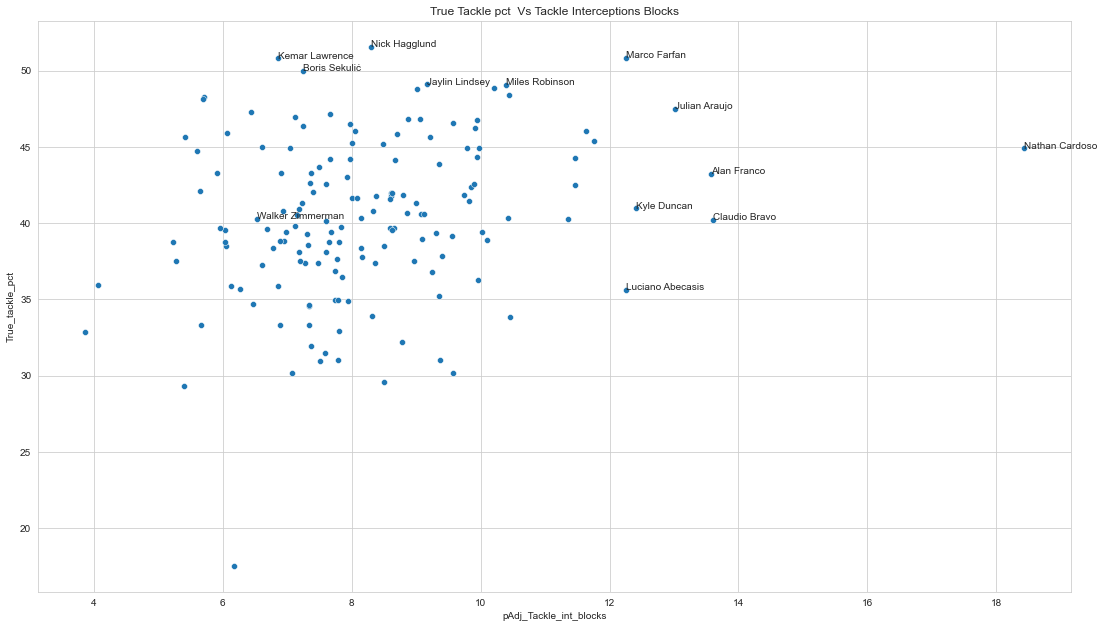

In [18]:

graph = defenders.loc[(df['Position']=='DF')&(df['Nineties']>10)]

sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


x = graph['pAdj_Tackle_int_blocks']
y = graph['True_tackle_pct']
p = graph['player_name']

g = sns.scatterplot(data=graph, x=x,y =y,
#                     hue='Squad_from_op',
                ax=ax).set(title='True Tackle pct  Vs Tackle Interceptions Blocks')


for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 49:
         plt.annotate(p, (x, y))
    elif x > 12:
        plt.annotate(p,(x,y))
        
    
    

# plt.tight_layout()

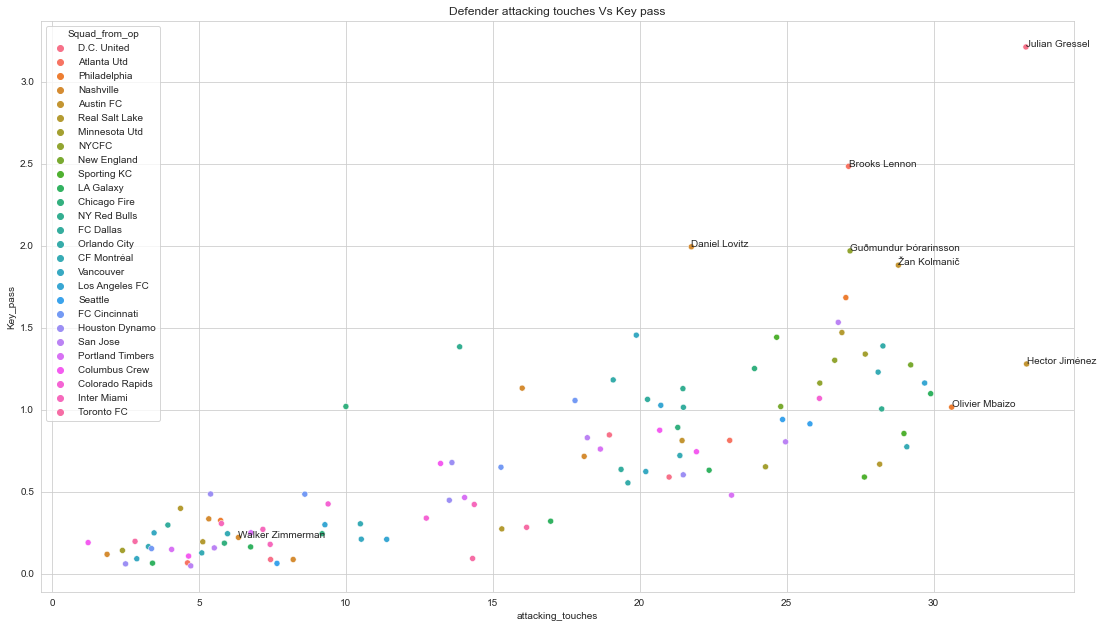

In [19]:

graph = df.loc[(df['Crosses']>.1)&(df['Position']=='DF')&(df['Nineties']>10)]

sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


x = graph['attacking_touches']
y = graph['Key_pass']
p = graph['player_name']

g = sns.scatterplot(data=graph, x=x,y =y,hue='Squad_from_op',
                ax=ax).set(title='Defender attacking touches Vs Key pass')


for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 1.8:
         plt.annotate(p, (x, y))
    elif x > 30:
        plt.annotate(p,(x,y))
        
    
    

# plt.tight_layout()

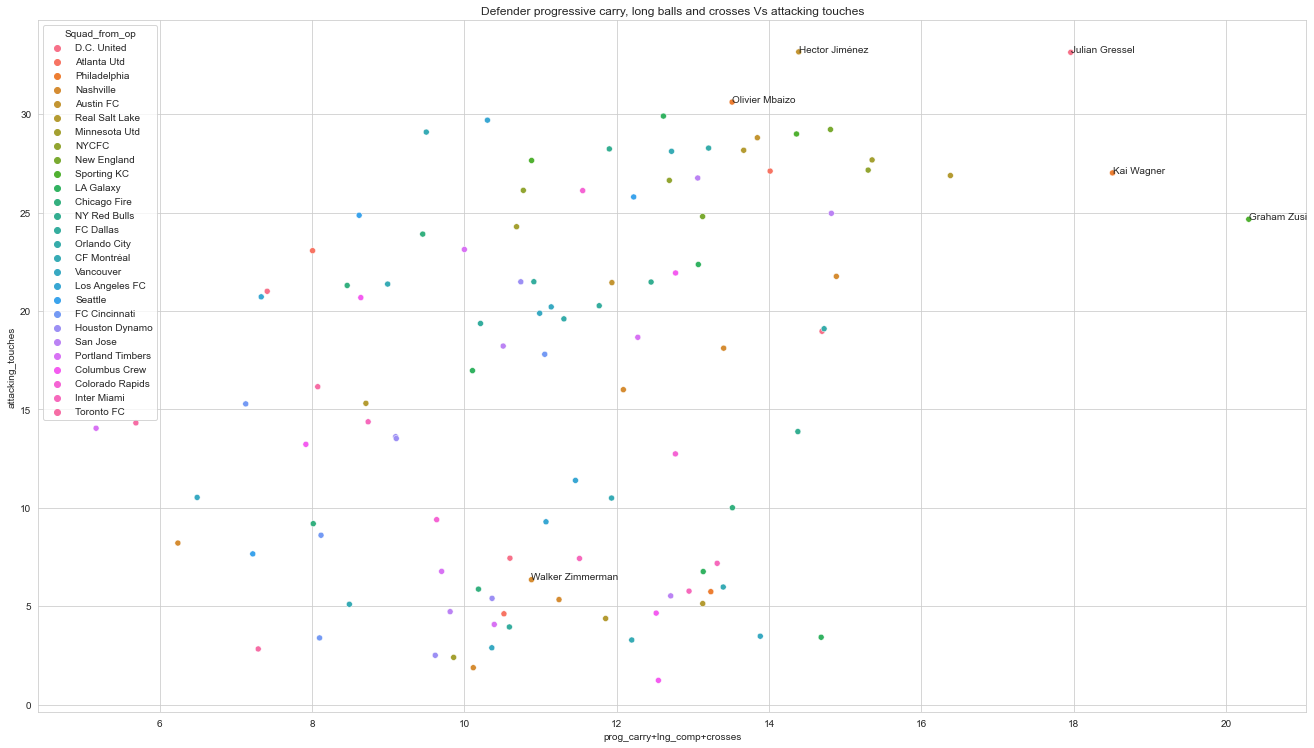

In [20]:

graph = df.loc[(df['Crosses']>.1)&(df['Position']=='DF')&(df['Nineties']>10)]

sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


x = graph['prog_carry+lng_comp+crosses']
y = graph['attacking_touches']
p = graph['player_name']

g = sns.scatterplot(data=graph, x=x,y =y,hue='Squad_from_op',
                ax=ax).set(title='Defender progressive carry, long balls and crosses Vs attacking touches')


for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 30:
         plt.annotate(p, (x, y))
    if x > 18:
        plt.annotate(p,(x,y))
        
    
    

plt.tight_layout()

### Walker is in the bottom left of this graph showing he does not carry or cross the ball in his role in the cener of the defense 


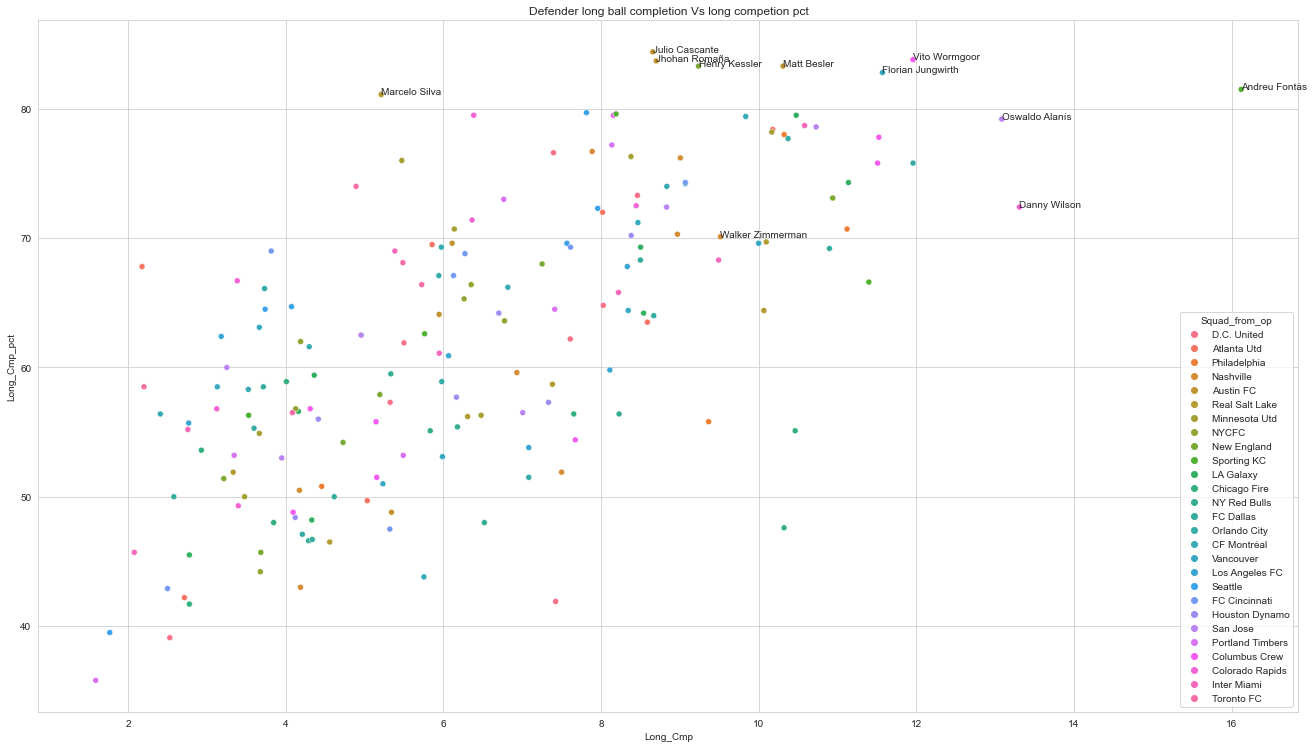

In [21]:
graph = df.loc[(df['pAdj_Tackle_int_blocks']<35)&(df['Position']=='DF')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>5)]

sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)


g = sns.scatterplot(data=graph, x ='Long_Cmp', y='Long_Cmp_pct',hue='Squad_from_op',
                ax=ax).set(title='Defender long ball completion Vs long competion pct')


x = graph['Long_Cmp']
y = graph['Long_Cmp_pct']
p = graph['player_name']
for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 80:
         plt.annotate(p, (x, y))
    elif x > 12:
        plt.annotate(p,(x,y))
    
    
plt.tight_layout()

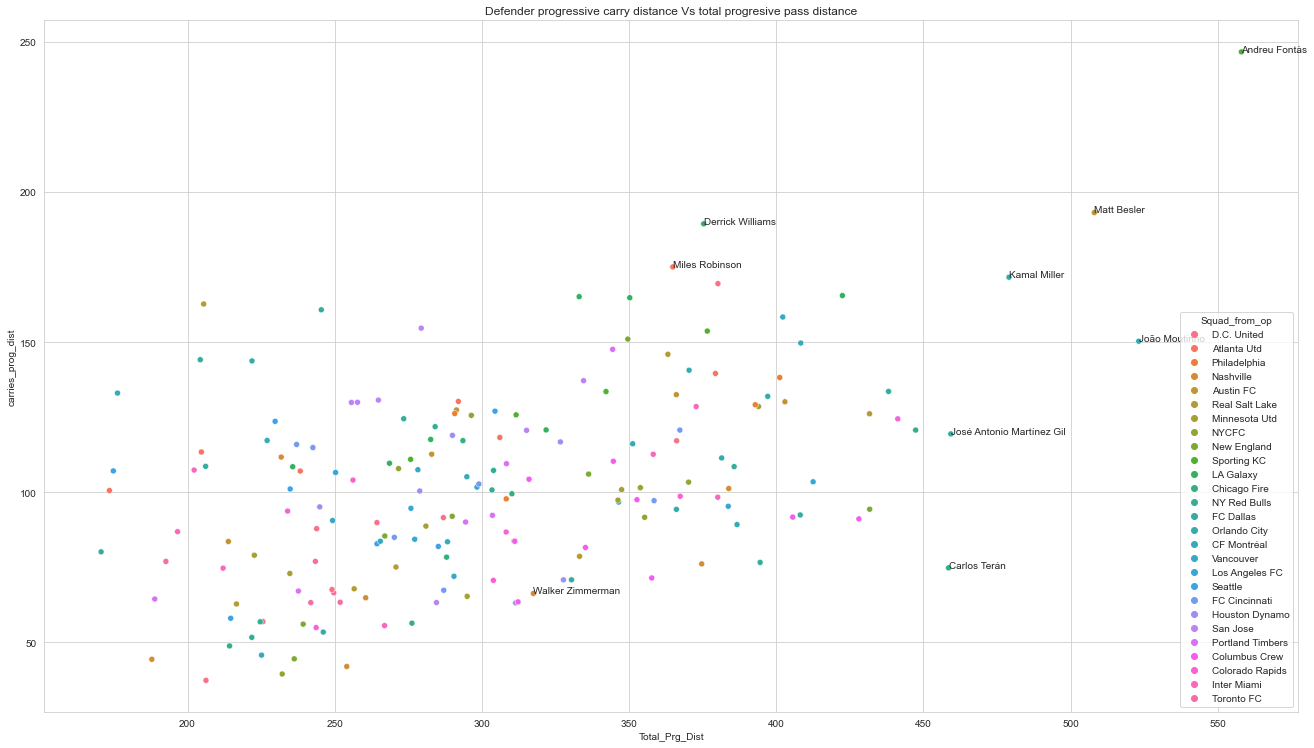

In [22]:
graph = df.loc[(df['pAdj_Tackle_int_blocks']<35)&(df['Position']=='DF')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>5)]
sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# plt.gca().invert_xaxis()
# plt.xticks(rotation = 90)

x = graph['Total_Prg_Dist']
y = graph['carries_prog_dist']
p = graph['player_name']

g = sns.scatterplot(data=graph, x =x, y=y,hue='Squad_from_op',
                ax=ax).set(title='Defender progressive carry distance Vs total progresive pass distance')


for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    elif y > 170:
         plt.annotate(p, (x, y))
    elif x > 450:
        plt.annotate(p,(x,y))
    
    
plt.tight_layout()


## 4 PCA of defensive and offensive features to observe spread of variation among players.

### 4.1 PCA on defensive features.

In [40]:
def_stats = defenders[[ 'pAdj_Total_tackles', 'pAdj_Tackles_Won', 'pAdj_Tackles_Def_3rd',
       'pAdj_Tackles_Mid_3rd', 'pAdj_Tackles_Att_3rd',
       'pAdj_Num_Dribblers_tackled', 'pAdj_Num_Dribbled_past',
        'pAdj_Blocks','pAdj_Interceptions', 'pAdj_Clearences',
       'pAdj_Fouls', 'pAdj_def_interceptions',
       'pAdj_Recoveries', 'pAdj_Aerial_Duels_lost',
       'True_tackle_pct', 'pAdj_Tackle_int_blocks']]
names = defenders['player_name']

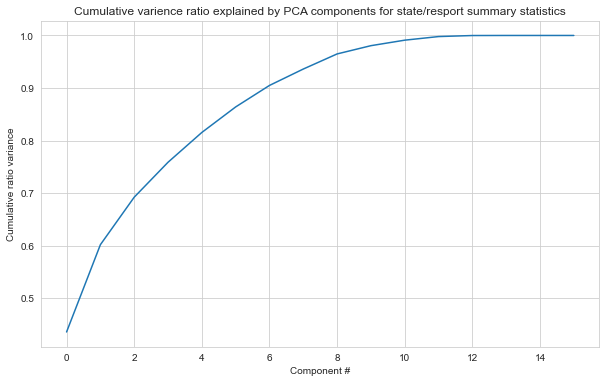

In [41]:
def_stats_scale = scale(def_stats)
def_scaled_df = pd.DataFrame(def_stats_scale, columns=def_stats.columns)
def_pca = PCA().fit(def_stats_scale)

plt.subplots(figsize=(10, 6))
plt.plot(def_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative varience ratio explained by PCA components for state/resport summary statistics');

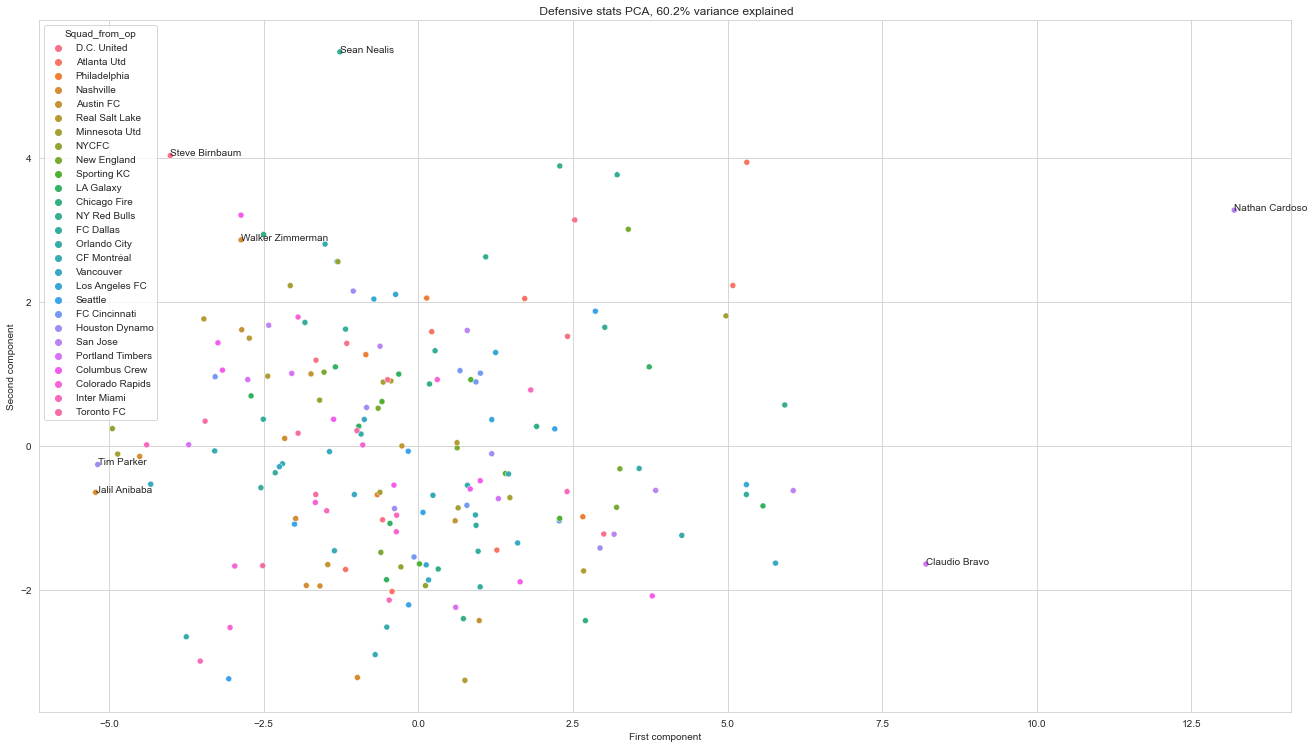

In [42]:

def_pca_x = def_pca.transform(def_stats_scale)
def_pca_df = pd.DataFrame(def_pca_x[:,:2])

sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
data = def_pca_x[:,0:2]
x = def_pca_x[:, 0]
y = def_pca_x[:, 1]
p = names
c = defenders['Squad_from_op']


pc_var = 100 * def_pca.explained_variance_ratio_.cumsum()[1]
g = sns.scatterplot(data=def_pca_df, x =x, y=y,hue=c, ax=ax)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f' Defensive stats PCA, {pc_var:.1f}% variance explained')

for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 4 or y<-4:
         plt.annotate(p, (x, y))
    if x > 7 or x< -5:
        plt.annotate(p,(x,y))

plt.tight_layout()

## 4.1 PCA for offensive features.


In [43]:
att_stats = defenders[['Nineties', 'xA',
       'Key_pass', 'Comp_prog', 
        'Total_Prg_Dist', 'Short_Cmp', 'Short_Att',
       'Short_Cmp_pct', 'Medium_Cmp', 'Medium_Att', 'Medium_Cmp_pct',
       'Long_Cmp', 'Long_Att', 'Long_Cmp_pct', 'touches',
       'touches_mid_3rd',
       'touches_att_3rd', 'touches_att_box', 'dribble_Succ',
       'dribble_Att', 'dribble_Succ_pct', 'num_dribble_past',
       'dribble_megs', 'carries', 'carries_prog_dist',
       'carries_prog', 'carries_att_3rd', 'carries_att_box',
       'miss_control', 'dispossed', 'recep_targ', 'recep_succ',
       'recept_pct', 'Fouls_drawn', 'Offsides', 'Crosses', 'PK_won',
       'Aerial_win_pct', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90',
       'G/Sh', 'G/SoT', 'xG', 'npxG',
       'npxG/Sh', 'np:G-xG']]

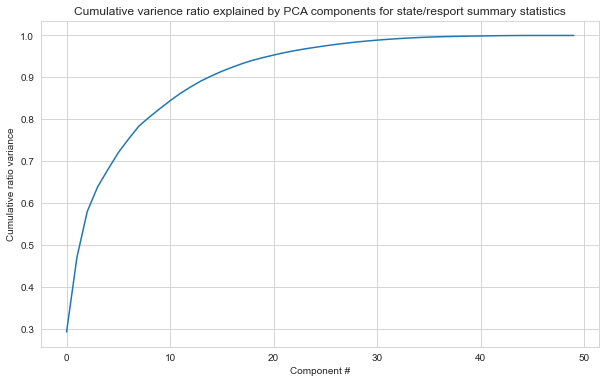

In [44]:
att_stats_scale = scale(att_stats)
att_scaled_df = pd.DataFrame(att_stats_scale, columns=att_stats.columns)

att_pca = PCA().fit(att_stats_scale)
att_pca_x = att_pca.transform(att_stats_scale)

plt.subplots(figsize=(10, 6))
plt.plot(att_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative varience ratio explained by PCA components for state/resport summary statistics');

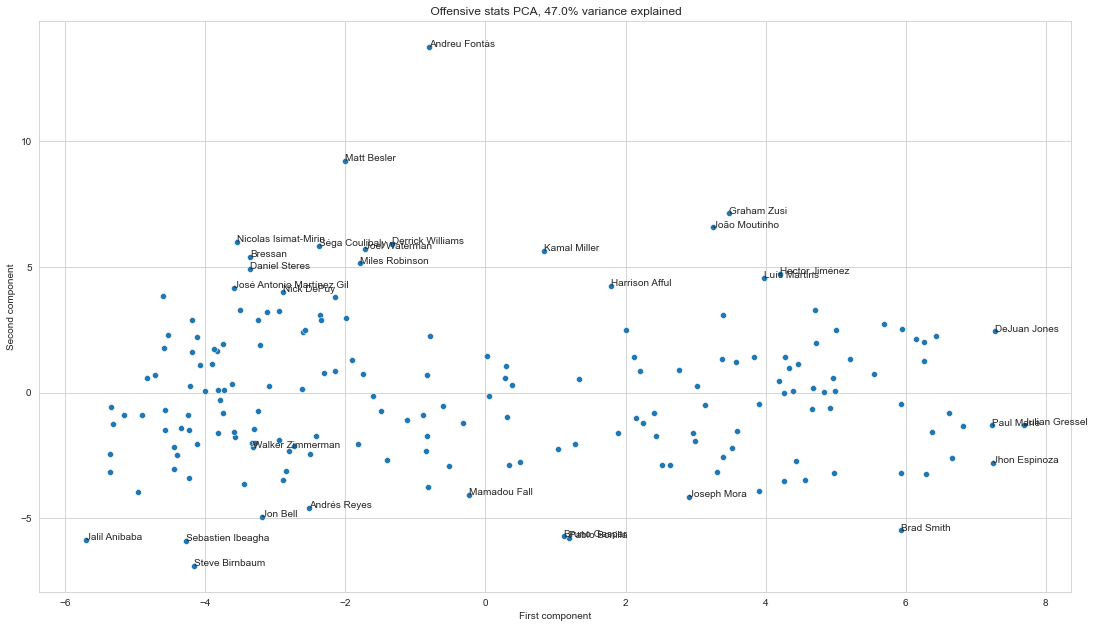

In [45]:
att_pca_df = pd.DataFrame(att_pca_x[:,:2])

sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
data = att_pca_x[:,0:2]
x = att_pca_x[:, 0]
y = att_pca_x[:, 1]
p = names
c = defenders['Squad_from_op']

pc_var = 100 * att_pca.explained_variance_ratio_.cumsum()[1]
g = sns.scatterplot(data=att_pca_df, x =x, y=y,
#                     hue=c, 
                    ax=ax)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f' Offensive stats PCA, {pc_var:.1f}% variance explained')

for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    elif y > 4 or y<-4:
         plt.annotate(p, (x, y))
    elif x > 7:
        plt.annotate(p,(x,y))
    